# Importing Libraries

In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
from sklearn.preprocessing import MinMaxScaler #for data normalization
from sklearn.decomposition import PCA # principal component analysis (PCA) for dimensionality reduction
from sklearn.model_selection import train_test_split #for splitting data into training and testing sets
import xgboost as xgb # Extreme Gradient Boosting Algorithm for training our model
from sklearn import metrics #for evaluating the model
from sklearn.metrics import  confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc

# Loading Handwriting Dataset
Data represents 18 handwriting features collected from 25 tasks each, performed by 174 participants that were either healthy (represented as H in data) or had Alzheimer's (represented as P in data).

In [22]:
url = 'https://raw.githubusercontent.com/teksongeap/Handwriting-Analysis-Alzheimers-Screening-Tool/main/data.csv'
data = pd.read_csv(url)

# Exploring Handwriting Dataset

In [23]:
# Show first 5 rows of dataset
data.head()

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P


In [24]:
# Show info on data and data types of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 452 entries, ID to class
dtypes: float64(300), int64(150), object(2)
memory usage: 614.6+ KB


In [25]:
# Show number of rows and columns in dataset
# Should show 174 rows for 174 participants and 452 columns for ID, class, and 18 features x 25 handwriting tasks
data.shape

(174, 452)

In [26]:
# Show data types in dataset
data.dtypes

ID                  object
air_time1            int64
disp_index1        float64
gmrt_in_air1       float64
gmrt_on_paper1     float64
                    ...   
paper_time25         int64
pressure_mean25    float64
pressure_var25     float64
total_time25         int64
class               object
Length: 452, dtype: object

In [27]:
# Show sum of each data type
data_type_counts = {
    'int': sum(data.dtypes == 'int64'),
    'object': sum(data.dtypes == 'object'),
    'float': sum(data.dtypes == 'float64')
}

for data_type, count in data_type_counts.items():
    print(f"Number of Columns that are {data_type}: {count}")

Number of Columns that are int: 150
Number of Columns that are object: 2
Number of Columns that are float: 300


In [28]:
# Show statistical summary of dataset
data.describe()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,...,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02
mean,5664.166667,0.000010,297.666685,200.504413,1977.965517,7323.896552,0.416374,0.179823,249.085549,0.067556,...,221.360646,0.148286,0.019934,4.472643,2.871613,85.839080,43109.712644,1629.585962,163061.767360,1.642033e+05
std,12653.772746,0.000003,183.943181,111.629546,1648.306365,2188.290512,0.381837,0.064693,132.698462,0.074776,...,63.762013,0.062207,0.002388,1.501411,0.852809,27.485518,19092.024337,324.142316,56845.610814,4.969397e+05
min,65.000000,0.000002,28.734515,29.935835,754.000000,561.000000,0.067748,0.096631,41.199445,0.011861,...,69.928033,0.030169,0.014987,1.323565,0.950249,32.000000,15930.000000,474.049462,26984.926660,2.998000e+04
25%,1697.500000,0.000008,174.153023,136.524742,1362.500000,6124.000000,0.218209,0.146647,161.136182,0.029523,...,178.798382,0.107732,0.018301,3.485934,2.401199,66.000000,32803.750000,1499.112088,120099.046800,5.917500e+04
50%,2890.000000,0.000009,255.791452,176.494494,1681.000000,6975.500000,0.275184,0.163659,224.445268,0.039233,...,217.431621,0.140483,0.019488,4.510578,2.830672,81.000000,37312.500000,1729.385010,158236.771800,7.611500e+04
75%,4931.250000,0.000011,358.917885,234.052560,2082.750000,8298.500000,0.442706,0.188879,294.392298,0.071057,...,264.310776,0.199168,0.021134,5.212794,3.335828,101.500000,46533.750000,1865.626974,200921.078475,1.275425e+05
max,109965.000000,0.000028,1168.328276,865.210522,18602.000000,15783.000000,2.772566,0.627350,836.784702,0.543199,...,437.373267,0.375078,0.029227,10.416715,5.602909,209.000000,139575.000000,1999.775983,352981.850000,5.704200e+06


In [29]:
# Print the names of columns that have objects as data
print(data.select_dtypes(include='object').columns.tolist())

['ID', 'class']


In [30]:
# Get the names of columns with NaN values
nan_cols = data.columns[data.isna().any()].tolist()

# Print the names of columns with NaN values
print("Columns with NaN values:", nan_cols)

Columns with NaN values: []


## Visualization \#1: Pie Chart Showing Percentage of Healthy and Alzheimer's Positive in Dataset

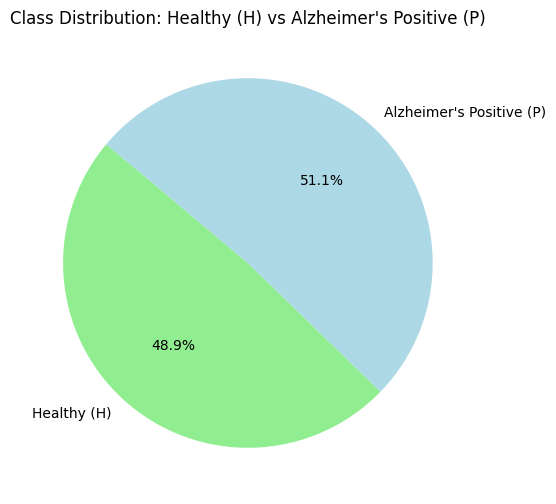

In [31]:
class_distribution = data['class']

# Calculate the proportion of each class
classes, counts = np.unique(class_distribution, return_counts=True)
class_proportions = counts / counts.sum()

# Create labels for the pie chart
labels = ['Healthy (H)', 'Alzheimer\'s Positive (P)']

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_proportions, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightblue'])
plt.title('Class Distribution: Healthy (H) vs Alzheimer\'s Positive (P)')
plt.show()

# Preprocessing Handwriting Dataset

In [32]:
# Dropping any duplicates
data = data.drop_duplicates()

# Dropping the ID column, we don't need that
data.drop('ID',axis = 1 , inplace = True)
data.head()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,0.051836,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,0.039827,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,0.064220,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,0.090408,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,0.037528,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P


## Dropping Columns From Dataset With Low Variance
The threshold 0.2 was determined after much stochastic experimentation and tuning. This will help pare down any irrelevant features in the dataset.

In [33]:
# Calculate variances
variances = data.var(numeric_only=True)
# Find the low variance features with variances not exceeding 20%
threshold = 0.2
# Use boolean mask with index to extract column names
low_variance_features = variances[variances <= threshold].index
# Drop the low variance features
df_filtered = data.drop(columns=low_variance_features)
df_filtered.shape

(174, 334)

## Applying Min Max Scaling
This will help keep the data within a certain range and prevent features with large scales skewing anything.

In [34]:
# Drop 'class' column for the X data frame
X = df_filtered.drop(['class'], axis=1)

# Apply min-max scaling to normalize data
mmc = MinMaxScaler()
X_scaled = mmc.fit_transform(X)

## Applying Principal Component Analysis
This will reduce dimensionality and make our model more generalizable.

In [35]:
# Perform the PCA transformation
# This will retain 75% of the explained variance in the transformed dataset
pca = PCA(n_components=0.75)
principal_components = pca.fit_transform(X_scaled)

# Create a new DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i + 1}' for i in range(pca.n_components_)])

# H (now 0) was for healthy, P (now 1) was for Alzheimer's positive in 'class' column
df_filtered['class'] = df_filtered['class'].replace({'H': 0, 'P': 1})
# Add 'class' back to principle components data frame
pc_df['class'] = df_filtered['class']
pc_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,class
0,0.123579,0.332303,-0.351176,-0.483255,-0.487280,0.090493,-0.210477,-0.980939,0.065533,-0.726104,...,-0.325673,-0.129855,1.059084,0.478149,0.576366,0.278678,0.428096,-0.061827,-0.561037,1
1,2.762988,0.064246,-0.348668,0.108566,-1.061183,0.683490,-0.144358,-0.234737,-0.099938,0.580639,...,-0.118717,-0.338424,0.110994,0.044564,0.107117,-0.157351,-0.021695,-0.070222,-0.218760,1
2,0.355816,0.040217,-0.578641,-0.235944,0.439980,-0.232421,-0.657689,0.398746,-0.269862,-0.047741,...,-0.069206,-0.054577,-0.315979,-0.189134,0.149984,0.054308,0.054373,0.084165,-0.105282,1
3,1.414916,-0.313672,-0.155481,0.321802,-0.262193,0.681193,-0.369839,0.143979,0.008916,0.280662,...,0.144484,0.083689,0.017519,0.548052,-0.112597,0.102900,-0.079625,0.125467,-0.138486,1
4,0.805645,-0.282694,-1.104000,-0.253378,-0.225806,0.184931,-0.437349,-0.371561,-0.258138,-0.044279,...,0.065664,0.263566,-0.075960,-0.064108,0.044913,-0.048296,-0.221405,0.084472,0.079017,1


# Training XGB Model On Preprocessed Data

In [36]:
# Split the data into training part (70%) and test part (30%)
X = pc_df.drop('class',axis = 1)
y = pc_df['class']
X_train , X_test , y_train , y_test = train_test_split(X, y, train_size = 0.70, random_state = 42)

# Create an XGBoost model
xgb_model = xgb.XGBClassifier( objective ='binary:logistic', max_depth = 5,  learning_rate = 0.06,   n_estimators = 400 )

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluating XGB Model

## Visualization \#2: Confusion Matrix

<Figure size 800x800 with 0 Axes>

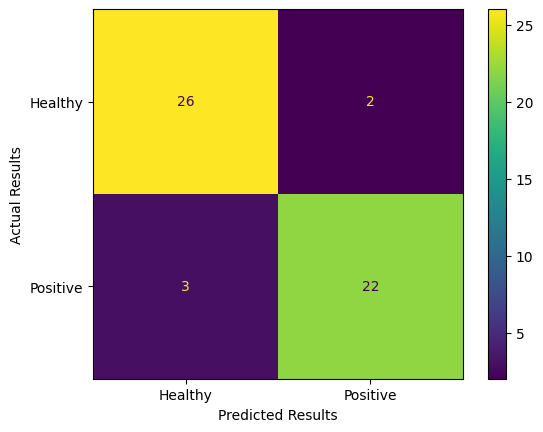

In [37]:
# Confusion matrix for showing number of false positives and false negatives
# Upper right represents false positives, lower left represents false negatives
confusion_matrix = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Healthy', 'Positive'])
plt.figure(figsize = (8,8))
cm_display.plot()
plt.xlabel('Predicted Results')
plt.ylabel('Actual Results')
plt.show()

## Visualization \#3: ROC Curve

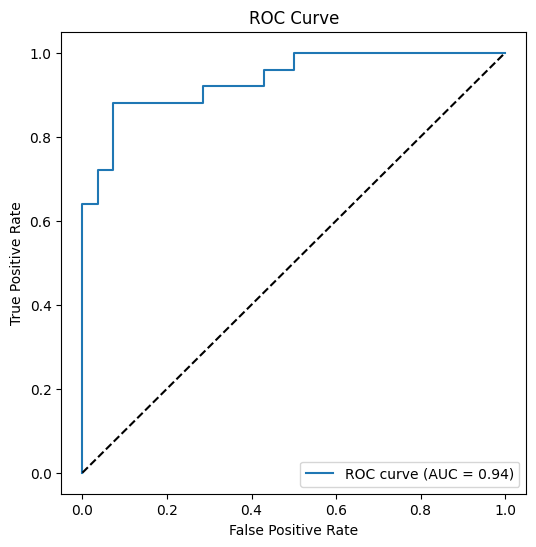

In [38]:
# ROC Curve for showing our true positive rate (more curvature and farther away from the dotted line means better)
# Dotted line represents a random classifier (no better than random, it's saying)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 6))
# AUC is literally "Area Underneath Curve," the closer it is to 1, the better at predicting the model was.
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Overall Evaluation Scores

In [39]:
# Calculate evaluation scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

# Show overall evaluation scores
print(f'F1 Score: {f1:.2f}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

F1 Score: 0.90
Accuracy: 0.91
Precision: 0.92
Recall: 0.88
ROC AUC: 0.94


#User Interface (input high variance features)
Since it would get pretty annoying inputting data for 450 features, we will allow the user to input just the features that captured 80% variance as specified in the df_filtered dataframe or simply click the green "***Fill With Test Values***" button for test values. Once all data has been put in, click on the red "***Predict Alzheimer's***" to get a prediction.

In [40]:
import ipywidgets as widgets
from IPython.display import display, HTML
import random


# Step 1: Create input fields for all high variance features
feature_inputs = []
num_rows = 18
num_cols = 19

for i in range(num_rows):
    row_inputs = []
    for j in range(num_cols):
        if i * num_cols + j < len(df_filtered.columns) - 1:
            feature = df_filtered.columns[i * num_cols + j]
            feature_label = widgets.Label(value=feature)
            feature_input = widgets.FloatText(value=0.0)
            feature_box = widgets.VBox([feature_label, feature_input])
            row_inputs.append(feature_box)
    feature_inputs.append(widgets.HBox(row_inputs))

# Create a VBox to display the input fields
input_box = widgets.VBox(feature_inputs)

# Create an output widget to display the prediction result
output_widget = widgets.Output()

# Default output
with output_widget:
      output_widget.clear_output()
      display(HTML(f'<p style="font-size: 30px; background-color: black;">Prediction Result:</p>'))

# Define a function to handle user input and prediction
def predict_alzheimers(feature_values):
    # Convert user input to a numpy array
    input_data = np.array([[feature_box.children[1].value for row in feature_inputs for feature_box in row.children]]).reshape(1, -1)

    # Create a DataFrame with the input data and original feature names
    input_df = pd.DataFrame(input_data, columns=df_filtered.columns[:-1])

    # Perform MinMaxScaler transformation on the input DataFrame
    input_data_scaled = mmc.transform(input_df)

    # Perform PCA transformation on the scaled input data
    input_data_pca = pca.transform(input_data_scaled)

    # Predict Alzheimer's using the trained XGBoost model
    prediction = xgb_model.predict(input_data_pca)

    # Display the prediction result
    with output_widget:
        output_widget.clear_output()
        if prediction[0] == 0:
            result = "No Alzheimer's detected (H)"
        else:
            result = "Alzheimer's detected (P)"
        display(HTML(f'<p style="font-size: 30px; background-color: black;">Prediction Result: {result}</p>'))

# Create a button to trigger the prediction
predict_button = widgets.Button(description="Predict Alzheimer's")
predict_button.on_click(lambda _: predict_alzheimers(feature_inputs))
# Button styling
predict_button.layout.height = '50px'
predict_button.layout.width = '200px'
predict_button.style.button_color = 'red'
predict_button.layout.margin = '10px'
predict_button.layout.padding = '10px'

# Create a button to fill input fields with random test values (special WGU evaluator edition)
def fill_test_values(feature_inputs):
    # Select a random row from df_filtered
    random_row = df_filtered.sample(n=1).iloc[0, :-1]

    # Fill the input fields with values from the random row
    for i, row in enumerate(feature_inputs):
        for j, feature_box in enumerate(row.children):
            feature_box.children[1].value = float(random_row[i * num_cols + j])

# Create the actual button
test_button = widgets.Button(description="Fill With Test Values")
test_button.on_click(lambda _: fill_test_values(feature_inputs))
# Style the button
test_button.layout.height = '50px'
test_button.layout.width = '200px'
test_button.style.button_color = 'green'
test_button.layout.margin = '10px'
test_button.layout.padding = '10px'

# Display the input fields, the test button, and the predict button
buttons_layout = widgets.HBox([test_button, predict_button])
display(buttons_layout)
display(output_widget)
display(input_box)
# You may not see the buttons right off the bat, so remember to scroll up
display(HTML(f'<p style="font-size: 30px;">SCROLL UP TO SEE BUTTONS!</p>'))



Output()